# Importings

In [1]:
# Importing basic stuff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Train test split
from sklearn.model_selection import train_test_split

# LDA
from sklearn.decomposition import LatentDirichletAllocation

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Gridsearch
from sklearn.model_selection import GridSearchCV

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For Bert
import torch
from transformers import AutoTokenizer, AutoModel

# Reading data and making it available for analysis

In [2]:
# Naming the columns of the dataset. https://stackoverflow.com/questions/31645466/give-column-name-when-read-csv-file-pandas
colNames = ['polarity', 'title', 'text']

# Loading Dataset and assigning column names
df = pd.read_csv("./data/test.csv", names=colNames, header=None)
#dflarge = pd.read_csv("./data/train.csv", names=colNames, header=None)

# Resizing the dataset, for faster computing time. A random sample from the dataset https://stackoverflow.com/questions/40986230/reduce-dataframe-size-in-pandas
df = df.sample(frac=0.1) # Get 10% of the data
#dflarge = dflarge.sample(frac=0.1) # 10% of the data

In [3]:
# Looking on the data
(
    df
    .sample(5)
    #.dtypes
    #.info()
    #.loc[:,["polarity"]]
    .loc[:,["title"]]
    #.loc[:,["text"]]
    #.value_counts()
    #.value_counts(normalize=True) # For seeing the count in %
    #.describe()
)

,title
329442,DOES NOT WORK WITH GH3!!
221350,Knockoffs!!!
171315,pumps slow
41069,Good graphics and great storyline!
75552,An Early Talent


In [4]:
# Cleaning the data. Removing null values and only take the values that contain info.
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
df.dropna(how='any')
df = df[df['title'].notna()]
df = df[df['text'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 330146 to 235414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  39999 non-null  int64 
 1   title     39999 non-null  object
 2   text      39999 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
# Assigning values to X and Y
xText = df.text
xTitle = df.title
y = df.polarity

xText.head(1)

330146    the product came in perfect condition and in a...
Name: text, dtype: object

In [6]:
# Train test split of data. Putting O at the end of the X variables for "original"
X_train, X_test, y_train, y_test = train_test_split(xText, y, test_size=0.33, random_state=42)

In [7]:
# Looking on one example
print("type of X_train: {}".format(type(X_train)))
print("length of X_train: {}".format(len(X_train)))
print("X_train[1]:\n{}".format(X_train.iloc[1500]))

type of X_train: <class 'pandas.core.series.Series'>
length of X_train: 26799
X_train[1]:
Like Daryl Hannah but this movie was bad. Sub-rate acting from all the actors and a predictable plot. If you are looking for an action movie with a female assassin, keep looking.


# Topic Categorization

In [55]:
# Configuration
# Defining the main variables to easily experiment
numberOfTopics = 20
numberOfTerms = 10
ngram = (1,2) # or (1,1)
LDAvectorizer = TfidfVectorizer #or CountVectorizer

In [56]:
# Using CountVectorizer, as in the other models that have been built. See this guide: https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/
vectLDA = LDAvectorizer(min_df=3,
                          ngram_range=ngram,
                          max_df=.01
                          #max_df=.1
                          #max_df=.15
                          )
X_trainLDA = vectLDA.fit_transform(X_train)

In [57]:
# See page 349 in the book, and https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
# Number of topics default is 10 and learning method defualt is "batch"
lda = LatentDirichletAllocation(n_components=numberOfTopics, learning_method="batch", max_iter=25, random_state=0)

# Fitting and transforming in one step
topics = lda.fit_transform(X_trainLDA)

# Printing the shape
lda.components_.shape

(20, 102276)

In [58]:
# Get Components/topics https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html 
lda_components=lda.components_

# Printing the topics with their terms
terms = vectLDA.get_feature_names_out()

# a for loop that takes the most frequent terms in each of the topics and prints it
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:numberOfTerms]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['lord', 'potty', 'bird', 'united', 'the lord', 'assemble', 'waffle', 'police', 'the united', 'artist']
Topic 1:  ['vhs', 'majority', 'speaker', 'majority of', 'the majority', 'subtitles', 'the volume', 'moments', 'usual', 'lives']
Topic 2:  ['diapers', 'wondering', 'whose', 'highly recommended', 'tragic', 'victim', 'geographic', 'but is', 'nt', 'lens']
Topic 3:  ['pan', 'warranty', 'defective', 'ipod', 'pump', 'vacuum', 'hose', 'this unit', 'door', 'charged']
Topic 4:  ['season', 'batteries', 'hair', 'dog', 'card', 'machine', 'games', 'software', 'edition', 'cable']
Topic 5:  ['tub', 'the tub', 'tree', 'hilary', 'serious', 'duff', 'da', 'buddy', 'the tree', 'mi']
Topic 6:  ['basket', 'conjunction', 'in conjunction', 'stage', 'conjunction with', 'cologne', 'serious', 'bon', 'the basket', 'apart']
Topic 7:  ['coffee', 'blu', 'blu ray', 'cup', 'coffee maker', 'maker', 'the coffee', 'cup of', 'ray', 'of coffee']
Topic 8:  ['condition', 'in timely', 'timely', 'described', 'ingred

# Basics - Countvectorizer plus logistic regression

In [39]:
# Configuration for the basic model
# Lining up some variables to choose from. Including the vectorizer
vectorizerForBasic = TfidfVectorizer # or CountVectorizer
ngramForBasic = (1,1) # or (1,2). Default is (1,1)
max_dfBasic = 0.01

In [41]:
# Applying Count vectorizer. Testing different max_df to get an understanding of the data
vect = vectorizerForBasic(min_df=3,
                          ngram_range = ngramForBasic,
                          max_df=max_dfBasic
                       )
vect.fit(X_train)
X_trainB = vect.transform(X_train)
X_testB = vect.transform(X_test)


In [44]:
# Looking on the vectorized features. See page 331 for code
feature_names = vect.get_feature_names_out() # under methods: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 10010 to 10030:\n{}".format(feature_names[10010:10030]))
print("Every 1000th feature:\n{}".format(feature_names[::1000]))

Number of features: 18745
First 20 features:
['00' '000' '007' '01' '02' '03' '04' '05' '06' '07' '08' '09' '1000'
 '101' '1010' '1012' '101st' '102' '1024x768' '103']
Features 10010 to 10030:
['lucky' 'lucy' 'ludicrous' 'ludlum' 'lug' 'luggage' 'lugging' 'luke'
 'lukewarm' 'lull' 'lullaby' 'lumbar' 'lump' 'lumped' 'lumps' 'lumpy'
 'luna' 'lunacy' 'lunatic' 'lunch']
Every 1000th feature:
['00' 'antivirus' 'bluegrass' 'chicks' 'coven' 'discrimination' 'ethical'
 'frizzy' 'heritage' 'isnt' 'lps' 'musics' 'pastiche' 'protagonists'
 'revere' 'shirley' 'stoped' 'toledo' 'virtuoso']


In [45]:
# Making a logistic regression model
BaseLR = LogisticRegression(max_iter=10000)

# Fitting the model
BaseLR.fit(X_trainB, y_train)

# Printing results
print("Accuracy on training set: {:.3f}".format(BaseLR.score(X_trainB, y_train)))
print("Accuracy on test set: {:.3f}".format(BaseLR.score(X_testB, y_test)))
#print("Best params: ", BaseLR.best_params_) # Printing the best params

Accuracy on training set: 0.870
Accuracy on test set: 0.766


In [46]:
# Evaluating results
y_pred = BaseLR.predict(X_testB)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76      6592
           2       0.75      0.79      0.77      6608

    accuracy                           0.77     13200
   macro avg       0.77      0.77      0.77     13200
weighted avg       0.77      0.77      0.77     13200



In [47]:
# Confusion matrix
# Making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4892 1700]
 [1385 5223]]


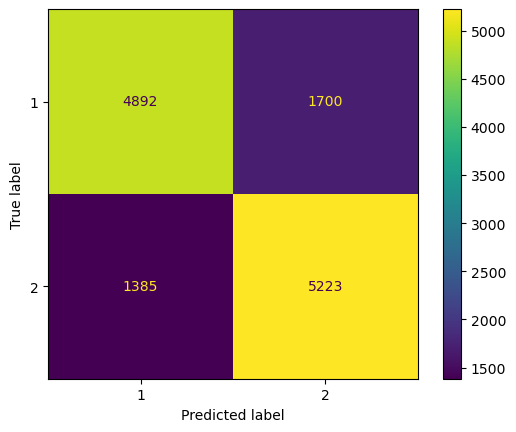

In [48]:
# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=BaseLR.classes_)
disp.plot()
plt.show()

In [54]:
# Printing the features, starting with the most common. https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
n = 10 # or None to print all

sum_words = X_trainB.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:n]
#print("First 20 features:\n{}".format(words_freq[:20]))

[('season', 77.0975931320251),
 ('batteries', 74.45184229564605),
 ('condition', 66.27358732546492),
 ('hair', 63.46354979792801),
 ('dog', 62.05754858954465),
 ('coffee', 62.01379035597133),
 ('games', 61.32073351312793),
 ('seller', 61.0722143889905),
 ('card', 59.16938835067244),
 ('machine', 56.85341402302508)]

# Sentiment analysis

In [8]:
# Printing function to be used at the end of each run through of a model. Name is a string, and should refer to the model. Search refers to the Gridsearch model.
def printScoreParams (name, search):
    print("The results from: " + name)
    print("Accuracy on training set: {:.3f}".format(search.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(search.score(X_test, y_test)))
    print("Best params: ", search.best_params_) # Printing the best params

## TfidVectorizer

Starting with making models using TfidVectorizer

### Configuration

In [9]:
# Predefined Standard variables for the pipeline and Gridsearch. To make the preprocessing with the vectorizer standard on all models. 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = TfidfVectorizer() # Alternatively one could apply Countvectorizer and then TfidTransformer afterwards
ngram_range = [(1,1),(1,2)]
use_idf = [True,False]
min_df = [3]
max_df = [.01, .1, .2] # 1%, 10% or 20%

### Logistic Regression

In [74]:
# Pipeline for Logistic Regression
pipeLR = Pipeline(steps=[
    ('Vectorizer', vectorizer),
    ('Model', LogisticRegression(max_iter=10000))
])

# Fitting the pipeline with data
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Model', LogisticRegression(max_iter=10000))])

In [75]:
# Printing scores
print("Accuracy on training set: {:.3f}".format(pipeLR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeLR.score(X_test, y_test)))

Accuracy on training set: 0.908
Accuracy on test set: 0.859


In [76]:
# Pipeline together with gridsearchCV: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# Defining parameters for the param grid
params = {
    'Vectorizer__ngram_range':ngram_range,
    'Vectorizer__min_df':min_df,
    'Vectorizer__max_df':max_df,
    'Vectorizer__use_idf':use_idf,
    'Model__C':[0.01, 0.1, 1, 10, 100]
}

# Defining grid search
searchLR = GridSearchCV(
    pipeLR,
    #verbose = 1.5, # To track the progress
    param_grid=params,
    cv=2,
)

# Fitting the grid search
searchLR.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                                       ('Model',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'Model__C': [0.01, 0.1, 1, 10, 100],
                         'Vectorizer__max_df': [0.01, 0.1, 0.2],
                         'Vectorizer__min_df': [3],
                         'Vectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Vectorizer__use_idf': [True, False]})

In [88]:
# Using the print function
printScoreParams('Logistic Regression', searchLR)

The results from: Logistic Regression
Accuracy on training set: 0.997
Accuracy on test set: 0.885
Best params:  {'Model__C': 10, 'Vectorizer__max_df': 0.2, 'Vectorizer__min_df': 3, 'Vectorizer__ngram_range': (1, 2), 'Vectorizer__use_idf': True}


### MLP

In [30]:
# Defining pipe for MLP
pipeMLP = Pipeline(steps=[
    ('Vectorizer', vectorizer),
    ('Model', MLPClassifier(max_iter=10000))
])

# Fitting the pipeline with the data
pipeMLP.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', MLPClassifier())])

In [31]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeMLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeMLP.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.822


In [ ]:
# Defining parameters for the param grid. Very intensive when it comes to computing time. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
params = {
    'Vectorizer__ngram_range':ngram_range,
    'Vectorizer__min_df':min_df,
    'Vectorizer__max_df':max_df,
    'Vectorizer__use_idf':use_idf,
    'Model__activation':['tanh','relu'],
    'Model__hidden_layer_sizes':[50,100],
}

# Defining grid search with the pipeline
searchMLP = GridSearchCV(
    pipeMLP,
    param_grid=params,
    cv=2,
    verbose = 1.5
)

# Fitting the grid search
searchMLP.fit(X_train, y_train)

In [89]:
# Printing the results
printScoreParams('MLP', searchMLP)

NameError: name 'searchMLP' is not defined

### Naive Bayes

In [78]:
# Defining pipe for Naive Bayes
pipeNB = Pipeline(steps=[
    ('Vectorizer', vectorizer),
    ('Model', MultinomialNB())
])

# Fitting the pipeline with the data
pipeNB.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()), ('Model', MultinomialNB())])

In [79]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeNB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeNB.score(X_test, y_test)))

Accuracy on training set: 0.892
Accuracy on test set: 0.816


In [80]:
# Defining parameters for the param grid. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
params = {
    'Vectorizer__ngram_range':ngram_range,
    'Vectorizer__min_df':min_df,
    'Vectorizer__max_df':max_df,
    'Vectorizer__use_idf':use_idf,
    'Model__fit_prior':[True,False]
}

# Defining grid search with the pipeline
searchNB = GridSearchCV(
    pipeNB,
    param_grid=params,
    cv=2
)

# Fitting the grid search
searchNB.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                                       ('Model', MultinomialNB())]),
             param_grid={'Model__fit_prior': [True, False],
                         'Vectorizer__max_df': [0.01, 0.1, 0.2],
                         'Vectorizer__min_df': [3],
                         'Vectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Vectorizer__use_idf': [True, False]})

In [90]:
# Printing
printScoreParams('Naive Bayes', searchNB)

The results from: Naive Bayes
Accuracy on training set: 0.932
Accuracy on test set: 0.862
Best params:  {'Model__fit_prior': False, 'Vectorizer__max_df': 0.2, 'Vectorizer__min_df': 3, 'Vectorizer__ngram_range': (1, 2), 'Vectorizer__use_idf': True}


### Random Forrest

In [93]:
# Defining pipe for Random Forrest
pipeRF = Pipeline(steps=[
    ('Vectorizer', vectorizer),
    ('Model', RandomForestClassifier())
])

# Fitting the pipeline with the data
pipeRF.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Model', RandomForestClassifier())])

In [94]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeRF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeRF.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.817


In [95]:
# Defining parameters for the param grid
params = {
    'Vectorizer__ngram_range':ngram_range,
    'Vectorizer__min_df':min_df,
    'Vectorizer__max_df':max_df,
    'Vectorizer__use_idf':use_idf,
    'Model__n_estimators':[50,100,150], # other parameters to be defined
    'Model__max_depth':[5,10],
    'Model__min_samples_leaf':[5,10],
    'Model__random_state':[42]
}

# Defining grid search with the pipeline
searchRF = GridSearchCV(
    pipeRF,
    param_grid=params,
    cv=2,
)

# Fitting the grid search
searchRF.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                                       ('Model', RandomForestClassifier())]),
             param_grid={'Model__max_depth': [5, 10],
                         'Model__min_samples_leaf': [5, 10],
                         'Model__n_estimators': [50, 100, 150],
                         'Model__random_state': [42],
                         'Vectorizer__max_df': [0.01, 0.1, 0.2],
                         'Vectorizer__min_df': [3],
                         'Vectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Vectorizer__use_idf': [True, False]})

In [96]:
# Printing
printScoreParams('Random Forest', searchRF)

The results from: Random Forest
Accuracy on training set: 0.827
Accuracy on test set: 0.807
Best params:  {'Model__max_depth': 10, 'Model__min_samples_leaf': 5, 'Model__n_estimators': 150, 'Model__random_state': 42, 'Vectorizer__max_df': 0.2, 'Vectorizer__min_df': 3, 'Vectorizer__ngram_range': (1, 2), 'Vectorizer__use_idf': True}


## BERT

Next up, we want to use Bert for preprocessing

In [9]:
# Configuration
modelName = 'distilbert-base-uncased'

In [12]:
# Retreiving Bert
bert = AutoModel.from_pretrained(modelName)
BertToken = AutoTokenizer.from_pretrained(modelName)
#print(bert)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
# Reducing data even more
df = df.sample(frac=0.1)

In [14]:
# Tokenizing
print("Tokenizing...")
tokenized = BertToken(
    df["text"].tolist(),
    add_special_tokens=True,
    padding='longest',
    return_attention_mask=True,
    return_tensors='pt',
    verbose=True
)
tokenized

Tokenizing...


{'input_ids': tensor([[ 101, 1996, 2338,  ...,    0,    0,    0],
        [ 101, 2009, 2003,  ...,    0,    0,    0],
        [ 101, 3685, 2424,  ...,    0,    0,    0],
        ...,
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        [ 101, 2057, 2024,  ...,    0,    0,    0],
        [ 101, 1045, 4149,  ...,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [15]:
# A function that was also used in Lab 7. Note that this is a ressource intensive task
def get_bert_embeddings(model, tokenized):

    """ Calculate BERT embeddings for a batch of sentences.
    NOTE: Calculating BERT embeddings is a very expensive operation.
    Particularly on CPU, it can take a long time to calculate embeddings for
    a large batch of sentences (Max 10-20 minutes for 6K sentences).

    Args:
        model (transformers BERT model): BERT model.
        tokenized (dict): Dictionary of tokenized sentences (input_ids and attention_mask)

    Returns:
        n-d NumPy array: BERT embeddings for the sentences in the batch.
    """

    print("Getting model encodings...")
    # The following is a context-manager that disables gradient calculation.
    # Disabling gradient calculation is useful for inference, when you are 
    # sure that you will not call Tensor.backward(). It will reduce memory 
    # consumption for computations that would otherwise have requires_grad=True.
    # TLDR: calculating gradients is expensive. We don't need them for inference.
    with torch.no_grad():
        last_hidden_states = model(**tokenized)

    # last_hidden_states[0] is the last hidden state of the first token of the
    # sequence (classification token) further processed by a Linear layer and 
    # a Tanh activation function. The Linear layer weights are trained from the
    #  next sentence prediction (classification) objective during pretraining.
    # last_hidden_states[0].shape = (batch_size, hidden_size)
    print("Returning embeddings...")
    return last_hidden_states[0][:,0,:].numpy()

embeddings = get_bert_embeddings(bert, tokenized)
embeddings.shape

Getting model encodings...


In [ ]:
# Making a new Train test split
X_trainBert, X_testBert, y_train, y_test = train_test_split(embeddings, df.polarity, random_state=42)

## Making Models with Bert

### Configuration

The main difference here, is that the preprocessing is already done. we can therefore make a function with gridsearch to go through all the models.

In [ ]:
# A function to be used on all models
def eval_model(model, params, name):
    grid = GridSearchCV(estimator=model, # The desired model is called from the model that is to be defined
                    param_grid=params, # The object is called by the later defined variable
                    cv=2)  # Using cross validation
    grid.fit(X_trainBert, y_train) # The scaled version of the data is used to fit the model(s)
    print(name)
    print("Accuracy on training set: {:.3f}".format(grid.score(X_trainBert, y_train)))
    print("Accuracy on test set: {:.3f}".format(grid.score(X_testBert, y_test)))
    print("Best params: ", grid.best_params_) # Printing the best params
    print(" ")

In [ ]:
# Configuration of the different models, Setting up the models with relevant parameters to tune. scikit learn documentation is used for each model to find parameters.
lr_B = LogisticRegression(max_iter=10000)
lrParams = {'C':[0.01,0.1,1,10,100]} 

mlp_B = MLPClassifier(max_iter=10000)
mlpParams = {'hidden_layer_sizes':[50,100], 'activation': [['tanh','relu']]}

NB_B = MultinomialNB()
NBParams = {'fit_prior':[True,False]} 

rfc_B = RandomForestClassifier()
rfcParams = {'n_estimators':[50,100,150], 'max_depth':[5,10],'min_samples_leaf':[5,10],'random_state':[42] }

### Logistic Regression

In [ ]:
# Applying the model with the function
eval_model(lr_B, lrParams, 'LRBert')

### MLP

In [ ]:
# Applying the model with the function
eval_model(mlp_B, mlpParams, 'MLPBert')

### Naive Bayes

In [ ]:
# Applying the model with the function
eval_model(NB_B, NBParams, 'NBBert')

### Random Forest

In [ ]:
# Applying the model with the function
eval_model(rfc_B, rfcParams, 'rfcBert')

## Summarizing

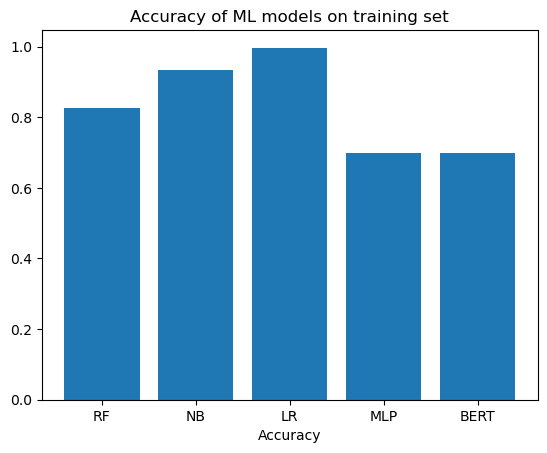

In [109]:
# Plotting the different accuracies and comparing them. https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
accuracies = [searchRF.score(X_train, y_train), 
              searchNB.score(X_train, y_train), 
              searchLR.score(X_train, y_train),
              0.7, # searchMLP.best_score_
              0.7 # searchBert.best_score_
              ]

# model names in the same order as accuracies
model_names = ["RF", "NB", "LR", "MLP", "BERT"]

# plot horizontal bar chart
plt.bar(model_names, accuracies)

# add axis labels and title
plt.xlabel("Accuracy")
plt.title("Accuracy of ML models on training set")

# show plot
plt.show()

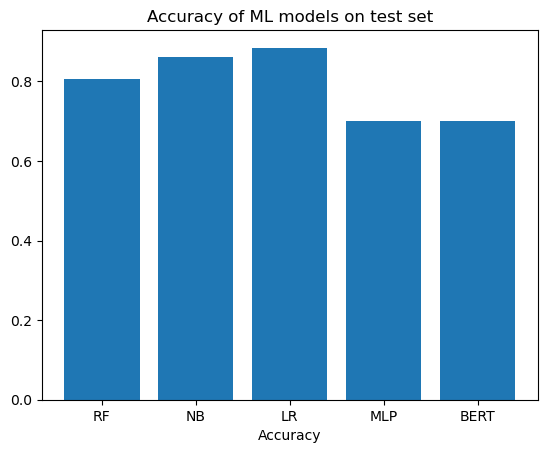

In [106]:
# Plotting the different accuracies on the test set and comparing them 
accuracies = [searchRF.score(X_test, y_test), 
              searchNB.score(X_test, y_test), 
              searchLR.score(X_test, y_test),
              0.7, # searchMLP.score(X_test, y_test)
              0.7 # searchBert.score(X_test, y_test)
              ]

# model names in the same order as accuracies
model_names = ["RF", "NB", "LR", "MLP", "BERT"]

# plot horizontal bar chart
plt.bar(model_names, accuracies)

# add axis labels and title
plt.xlabel("Accuracy")
plt.title("Accuracy of ML models on test set")

# show plot
plt.show()

# Experiment

In [ ]:
# Making a function for pipelines with gridsearch.
def fullPipeGrid(name, model, params):
    pipe = Pipeline(steps=[
        'vect',CountVectorizer(),
        'trans',TfidfTransformer(),
        'Model', model()
    ])

    # Parameters for countvectorizer and tfid transformer are fixed. We test for uni-, bi- and trigrams.
    paramsVect = {
        'CountVectorizer__ngram_range':[(1,1),(1,2),(1,3)],
        'TfidfTransformer__use_idf':[True,False],
    }

    paramsModel ={
        'model'
    }

    # Making the GridSearch
    grid = GridSearchCV(
        pipe,
        param_grid=params,
        cv = 2 # CV on 2, while building the code
    )
    grid.fit(X_train, y_train)
    print(name)
    print("Accuracy on training set: {:.3f}".format(grid.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(grid.score(X_test, y_test)))
    print("Best params: ", grid.best_params_) # Printing the best params
    print(" ")


SyntaxError: invalid syntax (2699255659.py, line 14)

In [ ]:
# Creating the preprocessing steps to be used in all pipelines. https://towardsdatascience.com/a-basic-introduction-to-pipelines-in-scikit-learn-bd4cee34ad95
preProcess_Steps = [
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
]

preProcess_Pipe = Pipeline(preProcess_Steps)

# If more steps to the preprocessing is necessary
#one_pipe = ColumnTransformer(transformers=[
#          ('preprocess', preProcess_Pipe),
#          ('anotherStep', insertVariable)
#          ] )

In [ ]:
# Making a Pipeline with Logistic Regression. Using CountVectorizer and TfidTransformer. 
pipeLR = Pipeline(steps=[
    ('preprocess', preProcess_Pipe),
    ('Model', LogisticRegression())
])

# Fitting the pipeline with data
pipeLR.fit(X_train, y_train)